In [1]:
import os
import numpy as np
import mne
import matplotlib.pyplot as plt  

In [2]:
current_folder = os.getcwd()
root_folder = os.path.dirname(current_folder)
print(current_folder)
print(root_folder)

C:\Users\Shizhe\brain_data\AudVisRhythm\data\code
C:\Users\Shizhe\brain_data\AudVisRhythm\data


In [3]:
# preload=True # (or string) in the constructor or raw.load_data()
subject = 'sub-002'
raw_file = os.path.join(root_folder,subject,'eeg', subject+'_task-Experiment_eeg.set')
print(raw_file)

C:\Users\Shizhe\brain_data\AudVisRhythm\data\sub-002\eeg\sub-002_task-Experiment_eeg.set


In [4]:
orig_raw = mne.io.read_raw_eeglab(raw_file)

Reading C:\Users\Shizhe\brain_data\AudVisRhythm\data\sub-002\eeg\sub-002_task-Experiment_eeg.fdt


In [5]:
# event_id = {"rt": 1, "square": 2}  # must be specified for str events
raw = mne.io.read_raw_eeglab(raw_file)
#orig_raw = raw.copy()
raw.load_data()

Reading C:\Users\Shizhe\brain_data\AudVisRhythm\data\sub-002\eeg\sub-002_task-Experiment_eeg.fdt
Reading 0 ... 815360  =      0.000 ...  3185.000 secs...


<RawEEGLAB  |  sub-002_task-Experiment_eeg.fdt, n_channels x n_times : 32 x 815361 (3185.0 sec), ~199.1 MB, data loaded>

%matplotlib inline
raw.plot_psd(fmax=150, tmax=200)
raw.plot(duration=60, start=1000, n_channels=32);

Filtering for slow drifts 

In [6]:
raw = raw.filter(l_freq=1, h_freq=55)  #l_freq=cutoff
raw = raw.notch_filter(freqs=60)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 55 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 55.00 Hz
- Upper transition bandwidth: 13.75 Hz (-6 dB cutoff frequency: 61.88 Hz)
- Filter length: 845 samples (3.301 sec)

Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 

raw.plot_psd(fmax=150, tmax=200)
raw.plot(duration=60, start=1000,scalings=dict(eeg=2*20e-6), n_channels=32);

# additional info

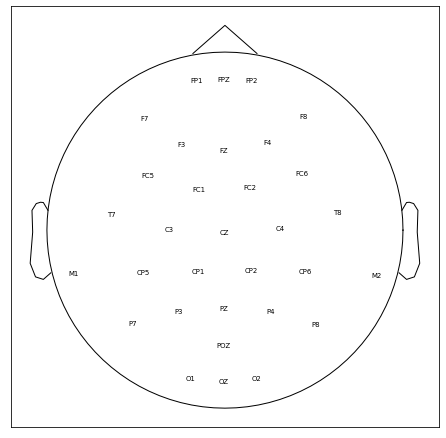

In [7]:
eeg_layout= mne.channels.find_layout(raw.info) #, ch_type='eeg')
eeg_layout.plot();

In [8]:
#print(raw.info)
print(raw.n_times); print(raw.n_times/256); print(raw.n_times/256/60);

815361
3185.00390625
53.0833984375


In [9]:
print(raw.ch_names)

['FP1', 'FPZ', 'FP2', 'F7', 'F3', 'FZ', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'M1', 'T7', 'C3', 'CZ', 'C4', 'T8', 'M2', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'PZ', 'P4', 'P8', 'POZ', 'O1', 'OZ', 'O2']


# Preprocessing 

Visualizing EOG and ECG artifact

In [10]:
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs, corrmap)

from importlib import reload
reload(plt)
%matplotlib notebook

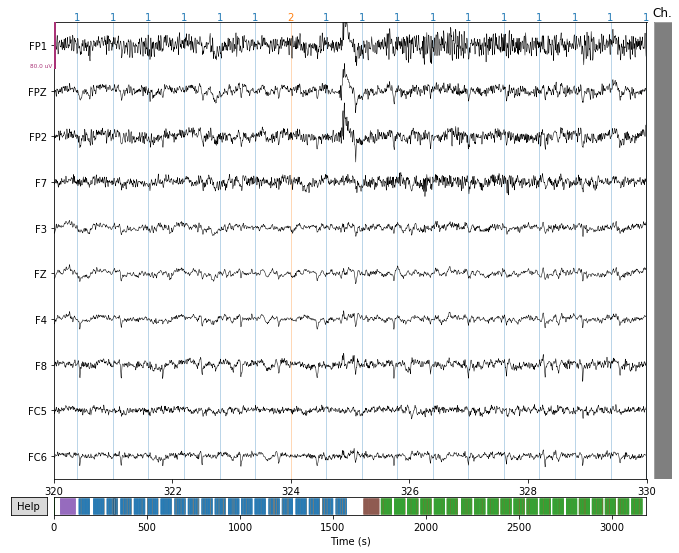

In [11]:
%matplotlib inline
regexp = 'FP.|F7|F8|F3|F4|FZ|FC5|FC6'
artifact_picks = mne.pick_channels_regexp(raw.ch_names, regexp=regexp)
raw.plot(start=320, scalings=dict(eeg=2*20e-6),order=artifact_picks, n_channels=len(artifact_picks));

In [12]:
# tried to visualize EOG epcohs but there is no EOG channel recordings, 
# but there is clear indicator of electrical noise generated by eye movement as seen from 310~330 ms
#eog_evoked = create_eog_epochs(raw).average()
#eog_evoked.apply_baseline(baseline=(None, -0.2))
#eog_evoked.plot_joint()

In [13]:
# unable to reconstract ECG channel
#ecg_evoked = create_ecg_epochs(raw).average()
#ecg_evoked.apply_baseline(baseline=(None, -0.2))
#ecg_evoked.plot_joint()

Filtering to remove slow drifts

In [14]:
#filt_raw = raw.copy()
#filt_raw.load_data().filter(l_freq=1., h_freq=None)

In [15]:
# Fitting and plotting the ICA solution

In [26]:
# set up and fit the ICA
#ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
#ica.fit(raw)
ica = ICA(n_components=10, random_state=97)
ica.fit(raw)

Fitting ICA to data using 32 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selection by number: 10 components
Fitting ICA took 15.3s.


<ICA  |  raw data decomposition, fit (fastica): 815361 samples, 10 components, channels used: "eeg">

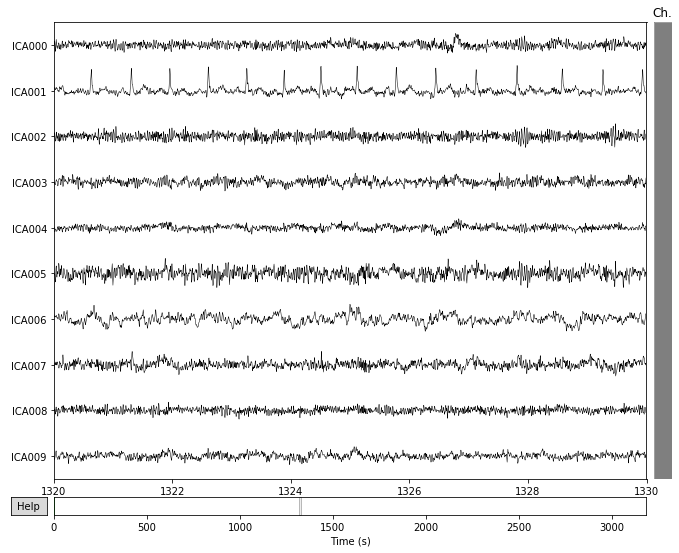

In [27]:
%matplotlib inline
ica.plot_sources(raw, start=1320, stop=1330);  # raw);

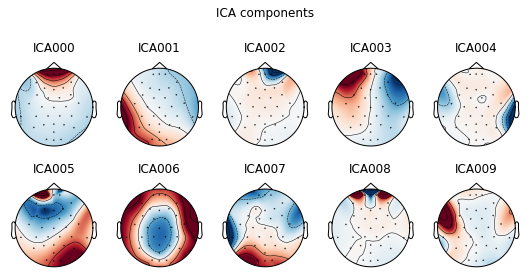

In [28]:
ica.plot_components();

    Using multitaper spectrum estimation with 7 DPSS windows
1592 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


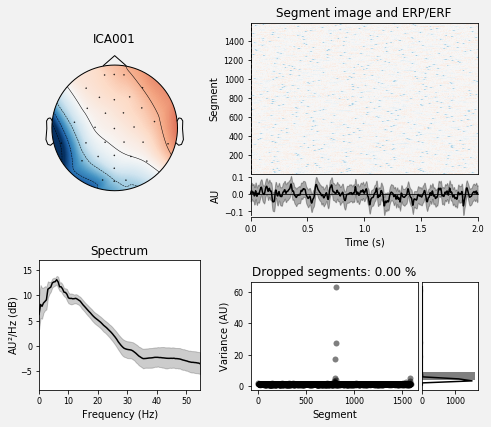

In [19]:
%matplotlib inline
#import matplotlib.pyplot as plt
#plt.tight_layout() 
#ica.exclude = [1, 5, 8]
ica.plot_properties(raw, picks=[1],psd_args=dict(fmax=55));
#ica.plot_properties(filt_raw, picks=[1, 5, 8, 11, 9, 10]);

likely heaert beat component

In [ ]:
# a brain component as seen from the strong 10 Hz peak, 9% residual variance of the single dipole model, and roughly dipolar scalp topography.

    Using multitaper spectrum estimation with 7 DPSS windows
1592 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1592 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


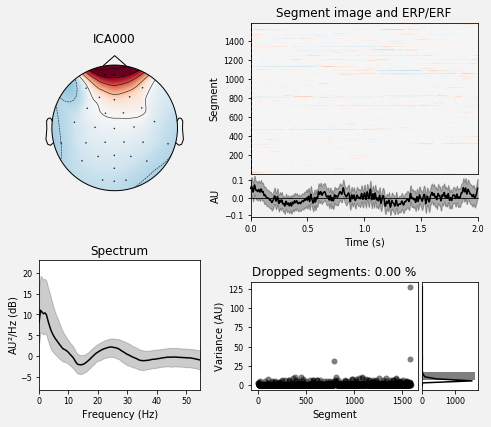

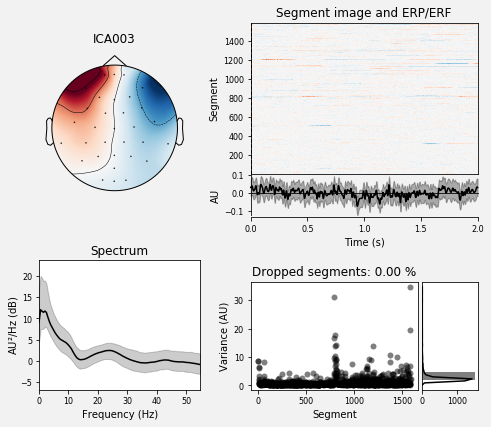

In [29]:
ica.plot_properties(raw, picks=[0, 3],psd_args=dict(fmax=55));

This components captures the effects of eye blinks. This is most clearly visible in the time series plot but can also be seen in the ERP Image. The scalp topography shows that the component affects the electrodes around the eyes, roughly equally.

Also, line noise is contamination from the alternating current that is used to power nearly all lighting fixtures and electronics these days. 60 Hz.

To avoid issues with this type of noise, many datasets are passed through a notch filter centered at either 50 Hz or 60 Hz. This will cause a sharp dip in the power spectrum at that frequency and is not indicative of any of these categories.

005: This components captures the effects of horizontal eye movement

    Using multitaper spectrum estimation with 7 DPSS windows
1592 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
1592 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


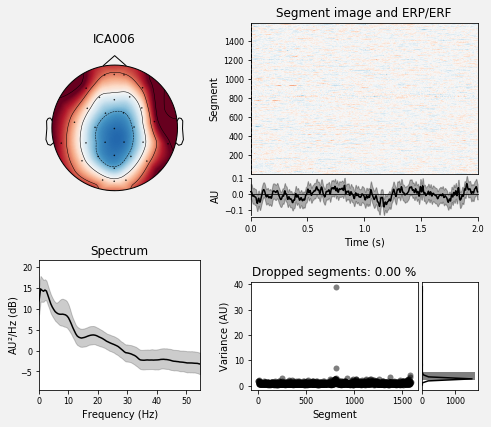

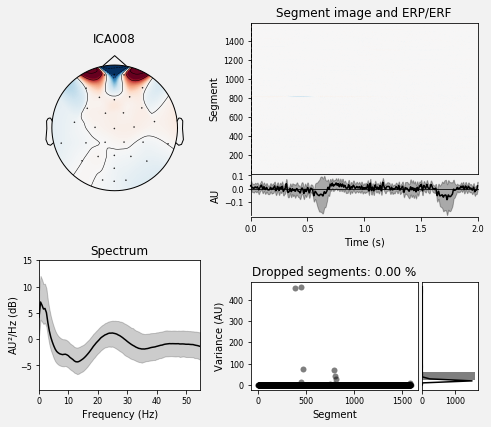

In [32]:
ica.plot_properties(raw, picks=[6, 8],psd_args=dict(fmax=55));

This component is most readily recognized by the power spectrum as it has low amounts of low frequency power and high amounts of broad band high frequency power. The dipoles are also located very close to the outside of the skull. Even though the component has high residual variance, the scalp topography a pattern that can easily be interpreted to be a very shallow dipole.

In [27]:
#ica.plot_properties(filt_raw, picks=[3,4],psd_args=dict(fmax=100));

However, there are no clear indicator for a heart components with different settings for ICA

Transforming to ICA space (10 components)
Zeroing out 2 ICA components


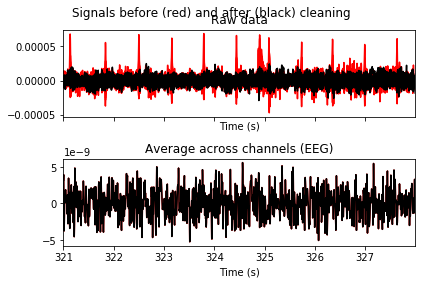

In [34]:
# blinks
plot_start = 321
ica.plot_overlay(raw, exclude=[0,1], start=plot_start*256, stop=(plot_start+7)*256);

In [35]:
ica.exclude = [0,1,3,8]

Transforming to ICA space (10 components)
Zeroing out 4 ICA components


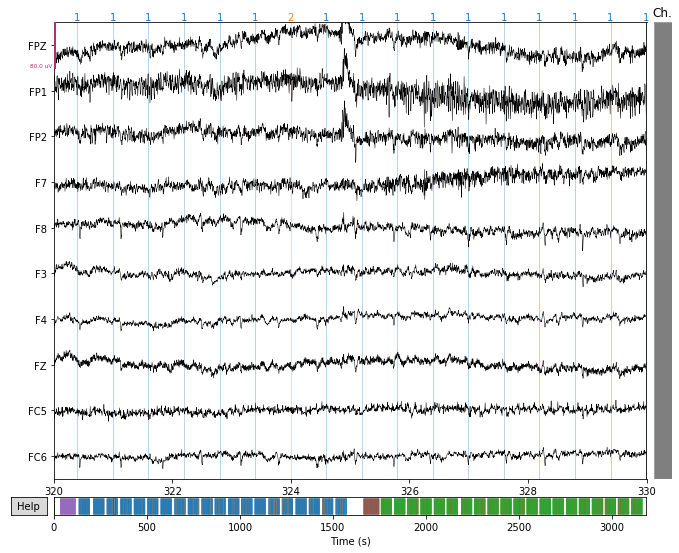

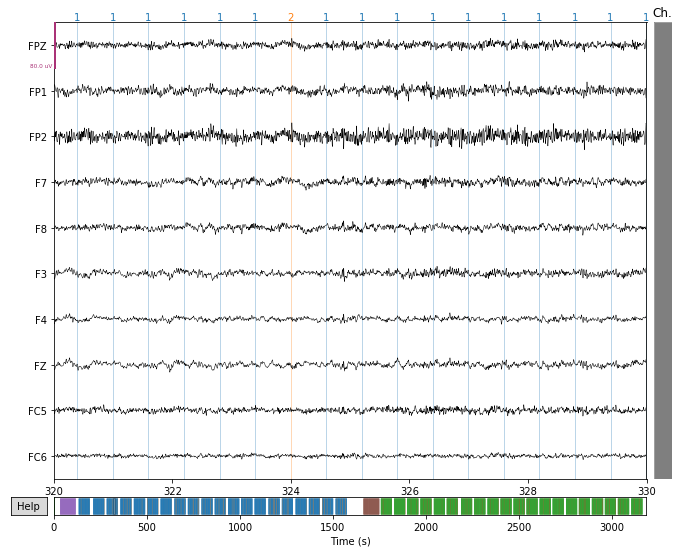

In [36]:
#orig_raw = raw.copy()
raw.load_data()
ica.apply(raw)
# show some frontal channels to clearly illustrate the artifact removal
chs = ['FPZ','FP1','FP2','F7','F8','F3','F4','FZ','FC5','FC6']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
orig_raw.plot(start=320, scalings=dict(eeg=2*20e-6),order=chan_idxs, n_channels=len(chan_idxs))
raw.plot(start=320, scalings=dict(eeg=2*20e-6),order=chan_idxs, n_channels=len(chan_idxs));

In [37]:
del orig_raw

In [38]:
raw.save(subject+'_eeg_processed.fif')

Writing C:\Users\Shizhe\brain_data\AudVisRhythm\data\code\sub-002_eeg_processed.fif


<ipython-input-38-db9855547491>:1: RuntimeWarning: This filename (C:\Users\Shizhe\brain_data\AudVisRhythm\data\code\sub-002_eeg_processed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw.save(subject+'_eeg_processed.fif')


Closing C:\Users\Shizhe\brain_data\AudVisRhythm\data\code\sub-002_eeg_processed.fif [done]


# Detecting experimental events

In [32]:
from mne.event import define_target_events
from mne.channels import make_1020_channel_selections

In [33]:
#"1":2 "Visual flash during visual omission condtion",
#"2":3 "Omitted Flash during visual omission condition",
#"3":4 "Auditory tone during auditory omission condition",
#"4":5 "Omitted tone during auditory omission condition",
#"5":6 "Visual Flash during visual non-omission/control condition",
#"6":7 "Auditory tone during auditory non-omission/control condition"

chs = ['FPZ','FP1','FP2']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
raw.plot(duration=30, start=140, scalings=dict(eeg=2*20e-6),order=chan_idxs, n_channels=len(chan_idxs));

In [34]:
#event_id = {'0, Impedance': 7 } #"VF": 1, "VO": 2, "AT": 3, "AO": 4, "VF-C": 5, "AT-C": 6}
#because of impedence, every event number was moved back 1
events = mne.events_from_annotations(raw)[0]
a = 0
print(events[a:a+5])   # show the first 5
# 7:Auditary Tone control | 4:Auditory tone  5:Auditory Omitted tone  
# 6:Visual Flash control  | 2:Visual Flash   3:Visual Omitted Flash

Used Annotations descriptions: ['1', '2', '3', '4', '5', '6', '__']
[[   0    0    7]
 [7899    0    5]
 [8053    0    5]
 [8206    0    5]
 [8360    0    5]]


In [35]:
event_dict = {'auditory/stim': 4, 'auditory/omit': 5, 
              'visual/stim': 2, 'visual/omit': 3, 
              'visual/stim/control': 6, 'auditory/stim/control': 7 , 'start': 1}

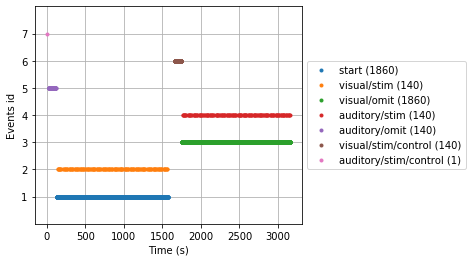

In [36]:
fig = mne.viz.plot_events(events, event_id=event_dict, sfreq=raw.info['sfreq'])
fig.subplots_adjust(right=0.7)  # make room for the legend

from importlib import reload
reload(plt)
%matplotlib notebook

In [37]:
#raw.plot(duration=60, start=1000, n_channels=32);

# Epoching continuous data

In [38]:
reject_criteria = dict(eeg=80e-6) #150e-6)       # 150 μV  #eog=250e-6)       # 250 μV

In [39]:
epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=-0.2, tmax=0.5,
                    reject=reject_criteria, preload=True)

4281 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 4281 events and 180 original time points ...
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
  

    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecti

    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecti

    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecti

    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecti

    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1'

    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecti

    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecti

    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['FP2', 'M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    

    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['F7', 'F8', 'M1', 'M2']
    Rejecting  epoch based on EEG : ['F7', 'M1']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['F7', 'M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch bas

    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecti

    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecti

    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecting  epoch based on EEG : ['M1']
    Rejecti

In [40]:
epochs.equalize_event_counts(['auditory/stim','visual/stim'])  # this operates in-place
epochs.equalize_event_counts(['auditory/omit','visual/omit'])

Dropped 71 epochs
Dropped 564 epochs


(<Epochs  |   1178 events (all good), -0.199219 - 0.5 sec, baseline [None, 0], ~51.9 MB, data loaded,
  'auditory/omit': 60
  'auditory/stim': 57
  'auditory/stim/control': 0
  'start': 944
  'visual/omit': 60
  'visual/stim': 0
  'visual/stim/control': 57>,
 array([1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1137,
        1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1147, 1148, 1149,
        1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160,
        1161, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1172, 1173,
        1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184,
        1185, 1186, 1187, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196,
        1197, 1198, 1199, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208,
        1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1220,
        1221, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1232, 1233,
        1234, 1236, 1237, 1238, 1239, 1241, 1242, 1243, 1244, 1245, 1247,
 

In [41]:
aud_stim_epochs = epochs['auditory/stim']
vid_stim_epochs = epochs['visual/stim']
auditory_omit_epochs = epochs['auditory/omit']
visual_omit_epochs = epochs['visual/omit']

57 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
57 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


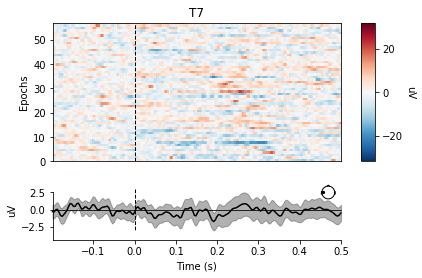

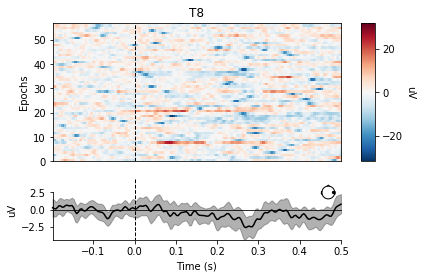

[<Figure size 432x288 with 4 Axes>, <Figure size 432x288 with 4 Axes>]

In [42]:
aud_stim_epochs.plot_image(picks=['T7','T8']) #,scalings=dict(eeg=0.5*1e6))

60 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
60 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


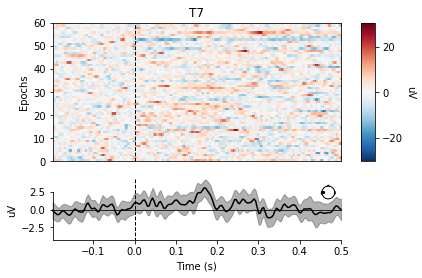

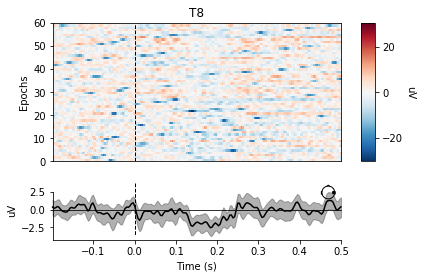

[<Figure size 432x288 with 4 Axes>, <Figure size 432x288 with 4 Axes>]

In [43]:
auditory_omit_epochs.plot_image(picks=['T7','T8'])

57 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
57 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


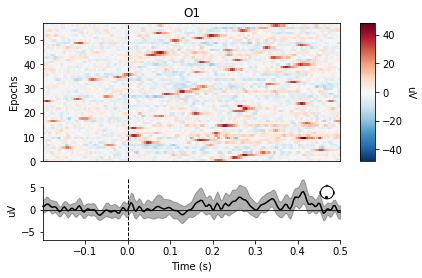

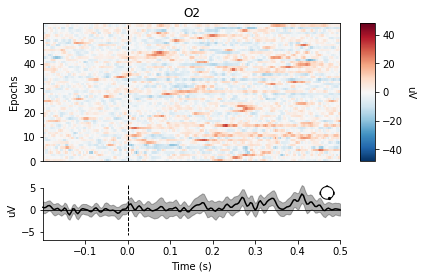

[<Figure size 432x288 with 4 Axes>, <Figure size 432x288 with 4 Axes>]

In [44]:
vid_stim_epochs.plot_image(picks=['O1','O2'])

60 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
60 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


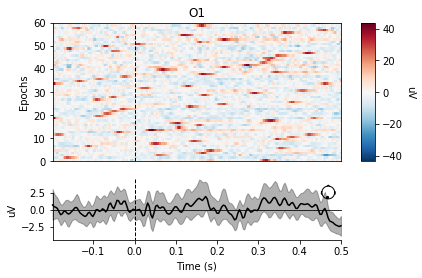

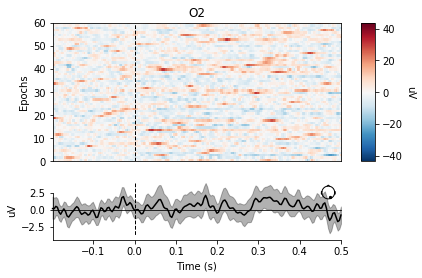

In [45]:
visual_omit_epochs.plot_image(picks=['O1','O2']); #,'OZ','POZ'])

# Estimating evoked responses

In [46]:
aud_stim_epochs = epochs['auditory/stim']
vid_stim_epochs = epochs['visual/stim']
auditory_omit_epochs = epochs['auditory/omit']
visual_omit_epochs = epochs['visual/omit']

In [47]:
aud_stim_evoked = aud_stim_epochs.average()
vis_stim_evoked = vid_stim_epochs.average()
aud_omit_evoked = auditory_omit_epochs.average()
vis_omit_evoked = visual_omit_epochs.average()


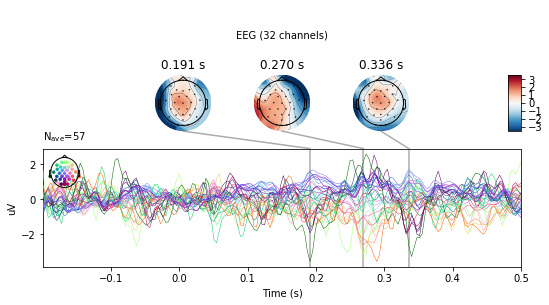

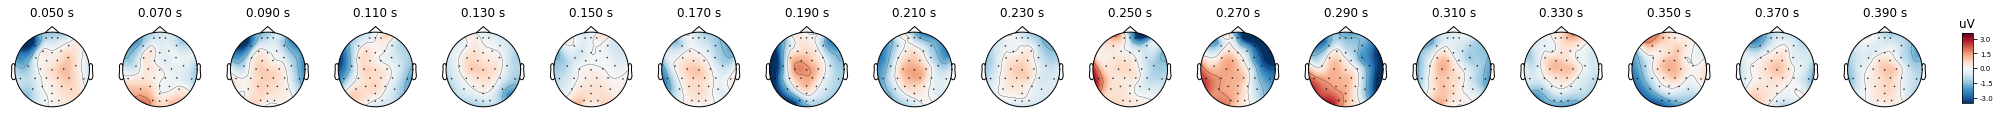

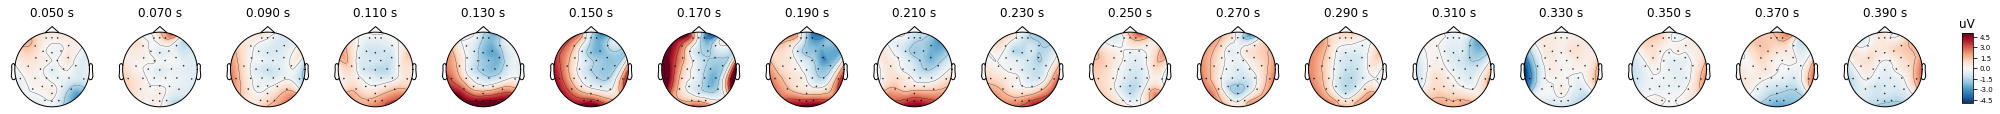

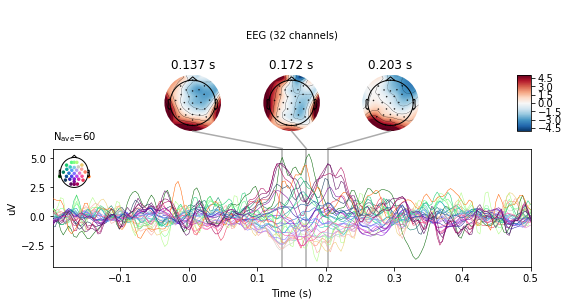

In [48]:
# playing tone at 100bpm
times = np.arange(0.05, 0.401, 0.02)
aud_stim_evoked.plot_joint()
aud_stim_evoked.plot_topomap(times)
#aud_omit_evoked.plot_joint(times=[0.082,0.125,0.188]); #,ts_args=dict(scalings=dict(eeg=1e6)));
aud_omit_evoked.plot_topomap(times);
aud_omit_evoked.plot_joint();

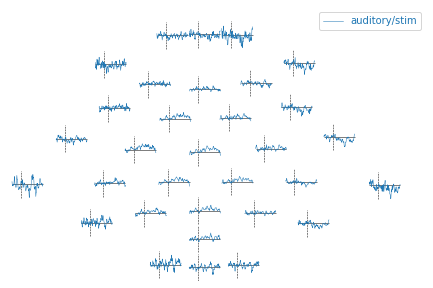

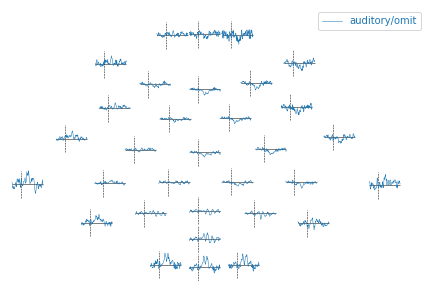

In [49]:
aud_stim_evoked.plot_topo();
aud_omit_evoked.plot_topo();

In [50]:
evoked_diff = mne.combine_evoked([aud_evoked, -vis_evoked], weights='equal')
evoked_diff.pick_types('mag').plot_topo(color='r', legend=False)

NameError: name 'aud_evoked' is not defined

In [ ]:
# flashing at 100bpm
vis_stim_evoked.plot_joint()
vis_stim_evoked.plot_topomap(times);
# vis_omit_evoked.plot_joint(times=[0.145,0.238,0.336]);
vis_omit_evoked.plot_topomap(times);
vis_omit_evoked.plot_joint();

In [ ]:
vis_stim_evoked.plot_topo();
vis_omit_evoked.plot_topo();

In [118]:
from importlib import reload
reload(plt)
%matplotlib notebook

In [121]:
%matplotlib notebook

In [ ]:
%matplotlib inline
chs = ['O2','O1','OZ','POZ']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
raw.plot(duration=10, start=2200, scalings=dict(eeg=2*20e-6),order=chan_idxs, n_channels=len(chan_idxs));

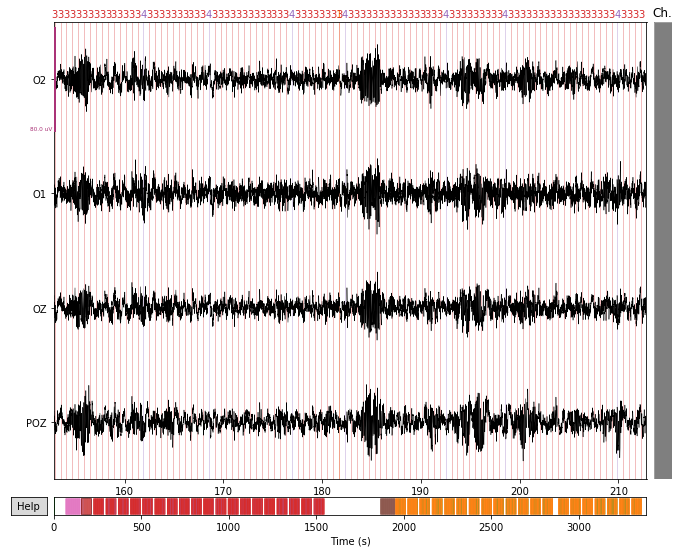

In [132]:
%matplotlib inline
chs = ['O2','O1','OZ','POZ']
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
raw.plot(duration=60, start=152.85, scalings=dict(eeg=2*20e-6),order=chan_idxs, n_channels=len(chan_idxs));

Effective window size : 8.000 (s)


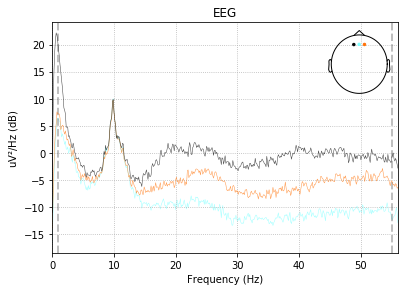

Effective window size : 8.000 (s)


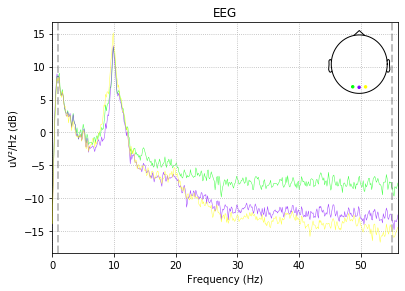

In [159]:
raw.plot_psd(fmax=56, tmin= 500, tmax=1000, picks=['FP1','FPZ','FP2']);
raw.plot_psd(fmax=56, tmin= 500, tmax=1000, picks=['O1','OZ','O2']);

Effective window size : 8.000 (s)


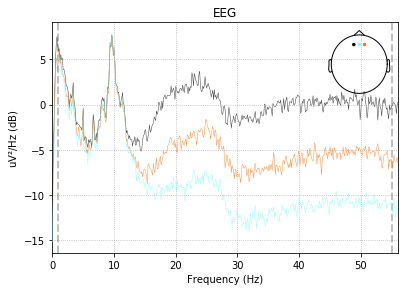

Effective window size : 8.000 (s)


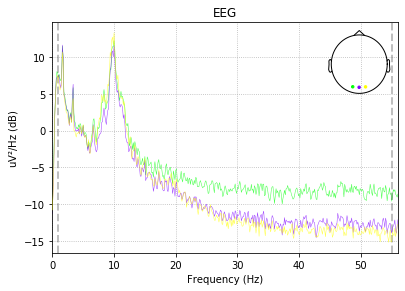

In [160]:
raw.plot_psd(fmax=56, tmin= 2000, tmax=2500, picks=['FP1','FPZ','FP2']);
raw.plot_psd(fmax=56, tmin= 2000, tmax=2500, picks=['O1','OZ','O2']);